<a href="https://colab.research.google.com/github/reza-nugraha32/data-sciences-lab/blob/main/seleksi_dsa_compfest15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [410]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import data rekap banjir tahun 2015-2020
data_2015 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2015.csv",
                        na_values="n.a", keep_default_na=False)
data_2016 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2016.csv",
                        na_values="n.a", keep_default_na=False)
data_2017 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2017.csv",
                        na_values="n.a", keep_default_na=False)
data_2018 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2018.csv",
                        na_values="n.a", keep_default_na=False)
data_2019 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2019.csv",
                        na_values="n.a", keep_default_na=False)
data_2020 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2020.csv",
                        na_values="n.a", keep_default_na=False)

# Import data curah hujan DKI Jakarta 2018-2020
data_hujan = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-curah-hujan.csv")

In [348]:
# Data kolom tahun untuk melabeli data tiap tahun
data_2015.insert(loc=0, column="tahun", value=[2015 for i in range(len(data_2015))])
data_2016.insert(loc=0, column="tahun", value=[2016 for i in range(len(data_2016))])
data_2017.insert(loc=0, column="tahun", value=[2017 for i in range(len(data_2017))])
data_2018.insert(loc=0, column="tahun", value=[2018 for i in range(len(data_2018))])
data_2019.insert(loc=0, column="tahun", value=[2019 for i in range(len(data_2019))])
data_2020.insert(loc=0, column="tahun", value=[2020 for i in range(len(data_2020))])

In [349]:
# Inisialisasi list dataset
list_data = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020]

# Inisialisasi dataframe dataset
data_rekap = pd.concat(list_data, axis=0, ignore_index=True)

# Dimensi dataset
print(data_rekap.shape)

(71, 16)


In [362]:
# Cetak 5 data pertama pada dataset
data_rekap.head()

,tahun,bulan,kecamatan,kelurahan,rata_rata_ketinggian_air,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian,jumlah_nilai_kerugian
0,2015,1,15,36,10-150,2,221,6095.0,13073.0,0,0,0,0,3255,59,0.0
1,2015,3,12,15,10-200,4,30,2869.0,8119.0,0,0,0,0,822,5,0.0
2,2015,4,4,6,20-100,3,18,2235.0,7905.0,0,0,0,0,0,0,0.0
3,2015,5,1,1,20-100,1,7,423.0,2088.0,0,0,0,0,0,0,0.0
4,2015,6,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0.0


In [351]:
# Data profiling
# List data types pada dataset
print("Data types:")
print(data_rekap.dtypes)
print()

# Cek missing values pada dataset
print("Check for missing values:")
print(data_rekap.isnull().any())
print()

# Cek duplikasi data pada dataset
print("Check for duplicates:")
data_rekap.duplicated()

Data types:
tahun                                int64
bulan                                int64
kecamatan                            int64
kelurahan                            int64
rata_rata_ketinggian_air            object
lama_genangan                        int64
rw_terdampak                         int64
kk_terdampak                       float64
jiwa_terdampak                     float64
korban_meninggal                     int64
korban_hilang                        int64
korban_luka_berat                    int64
korban_luka_ringan                   int64
jumlah_jiwa_pengungsi_tertinggi      int64
jumlah_tempat_pengungsian            int64
jumlah_nilai_kerugian              float64
dtype: object

Check for missing values:
tahun                              False
bulan                              False
kecamatan                          False
kelurahan                          False
rata_rata_ketinggian_air           False
lama_genangan                      False
rw_terdampak 

0     False
1     False
2     False
3     False
4     False
      ...  
66    False
67    False
68    False
69    False
70    False
Length: 71, dtype: bool

In [352]:
# Missing values pada kolom kk_terdampak
ratio_of_missing_values = (len(data_rekap["kk_terdampak"])
                            - data_rekap["kk_terdampak"].count())/len(data_rekap["kk_terdampak"])

percent_of_missing_values = "{0:.1f}%".format(ratio_of_missing_values*100)
print("Percentage of missing values in the column kk_terdampak:", percent_of_missing_values)

# Missing values pada kolom jiwa_terdampak
ratio_of_missing_values = (len(data_rekap["jiwa_terdampak"])
                            - data_rekap["jiwa_terdampak"].count())/len(data_rekap["jiwa_terdampak"])

percent_of_missing_values = "{0:.1f}%".format(ratio_of_missing_values*100)
print("Percentage of missing values in the column jiwa_terdampak:", percent_of_missing_values)

Percentage of missing values in the column kk_terdampak: 4.2%
Percentage of missing values in the column jiwa_terdampak: 5.6%


In [353]:
# Missing Value Handling
# Isi missing value kolom dengan mean
data_rekap["kk_terdampak"].fillna(data_rekap["kk_terdampak"].mean(), inplace=True)
data_rekap["jiwa_terdampak"].fillna(data_rekap["jiwa_terdampak"].mean(), inplace=True)
data_rekap["jumlah_nilai_kerugian"].fillna(0, inplace=True)

# Cek missing values pada dataset
print("Check for missing values:")
print(data_rekap.isnull().any())
print()

Check for missing values:
tahun                              False
bulan                              False
kecamatan                          False
kelurahan                          False
rata_rata_ketinggian_air           False
lama_genangan                      False
rw_terdampak                       False
kk_terdampak                       False
jiwa_terdampak                     False
korban_meninggal                   False
korban_hilang                      False
korban_luka_berat                  False
korban_luka_ringan                 False
jumlah_jiwa_pengungsi_tertinggi    False
jumlah_tempat_pengungsian          False
jumlah_nilai_kerugian              False
dtype: bool



2015
Check for missing values:
tahun                              False
bulan                              False
kecamatan                          False
kelurahan                          False
rata_rata_ketinggian_air           False
lama_genangan                      False
rw_terdampak                       False
kk_terdampak                       False
jiwa_terdampak                     False
korban_meninggal                   False
korban_hilang                      False
korban_luka_berat                  False
korban_luka_ringan                 False
jumlah_jiwa_pengungsi_tertinggi    False
jumlah_tempat_pengungsian          False
jumlah_nilai_kerugian              False
dtype: bool

Initial shape:  (12, 16)


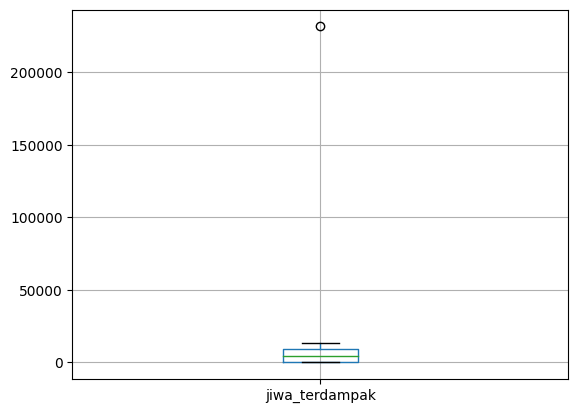

Final shape:  (11, 16)


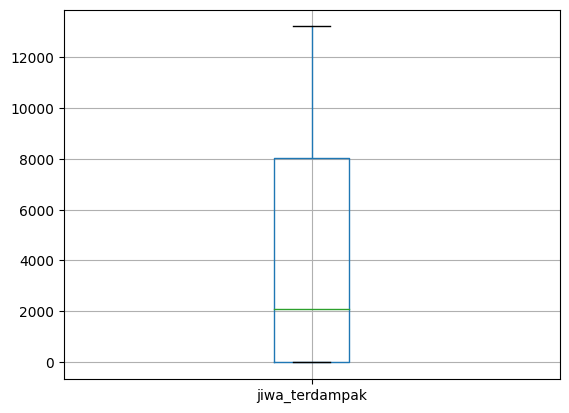

2016
Check for missing values:
tahun                              False
bulan                              False
kecamatan                          False
kelurahan                          False
rata_rata_ketinggian_air           False
lama_genangan                      False
rw_terdampak                       False
kk_terdampak                       False
jiwa_terdampak                     False
korban_meninggal                   False
korban_hilang                      False
korban_luka_berat                  False
korban_luka_ringan                 False
jumlah_jiwa_pengungsi_tertinggi    False
jumlah_tempat_pengungsian          False
jumlah_nilai_kerugian              False
dtype: bool

Initial shape:  (11, 16)


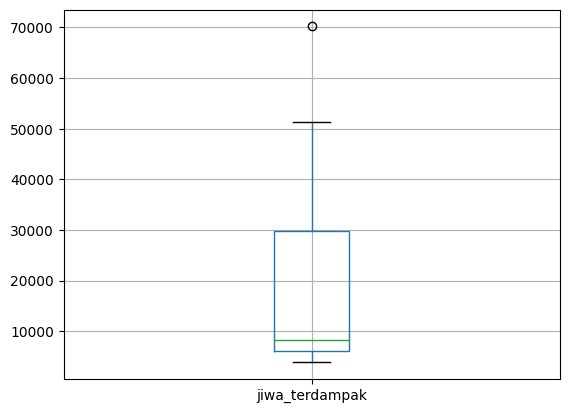

Final shape:  (10, 16)


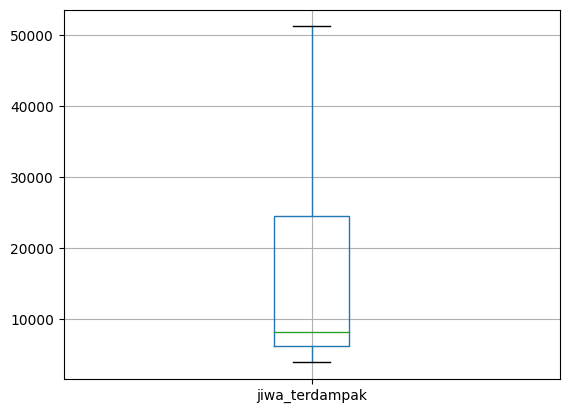

2017
Check for missing values:
tahun                              False
bulan                              False
kecamatan                          False
kelurahan                          False
rata_rata_ketinggian_air           False
lama_genangan                      False
rw_terdampak                       False
kk_terdampak                       False
jiwa_terdampak                     False
korban_meninggal                   False
korban_hilang                      False
korban_luka_berat                  False
korban_luka_ringan                 False
jumlah_jiwa_pengungsi_tertinggi    False
jumlah_tempat_pengungsian          False
jumlah_nilai_kerugian              False
dtype: bool

Initial shape:  (12, 16)


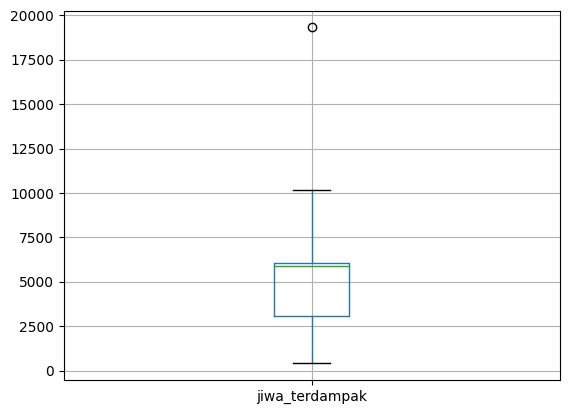

Final shape:  (11, 16)


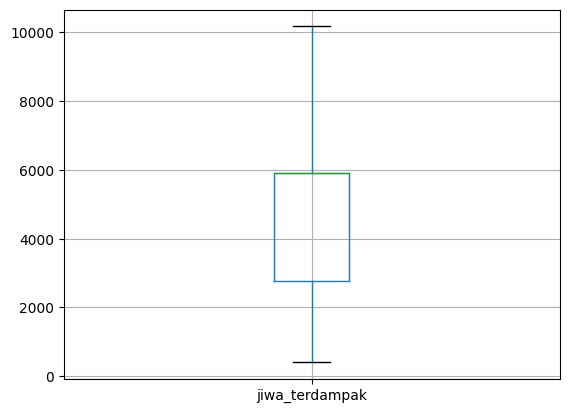

2018
Check for missing values:
tahun                              False
bulan                              False
kecamatan                          False
kelurahan                          False
rata_rata_ketinggian_air           False
lama_genangan                      False
rw_terdampak                       False
kk_terdampak                       False
jiwa_terdampak                     False
korban_meninggal                   False
korban_hilang                      False
korban_luka_berat                  False
korban_luka_ringan                 False
jumlah_jiwa_pengungsi_tertinggi    False
jumlah_tempat_pengungsian          False
jumlah_nilai_kerugian              False
dtype: bool

Initial shape:  (12, 16)


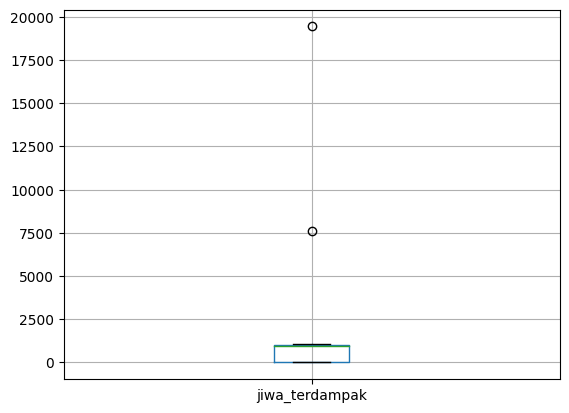

Final shape:  (10, 16)


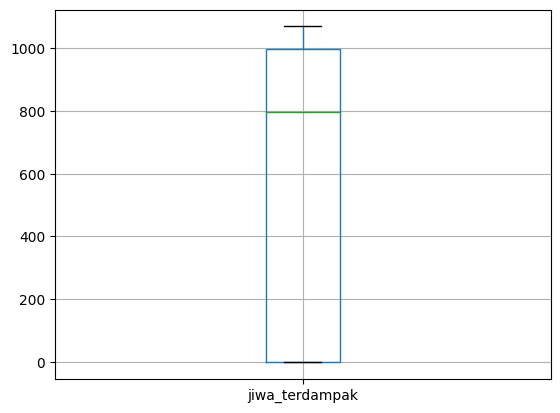

2019
Check for missing values:
tahun                              False
bulan                              False
kecamatan                          False
kelurahan                          False
rata_rata_ketinggian_air           False
lama_genangan                      False
rw_terdampak                       False
kk_terdampak                       False
jiwa_terdampak                     False
korban_meninggal                   False
korban_hilang                      False
korban_luka_berat                  False
korban_luka_ringan                 False
jumlah_jiwa_pengungsi_tertinggi    False
jumlah_tempat_pengungsian          False
jumlah_nilai_kerugian              False
dtype: bool

Initial shape:  (12, 16)


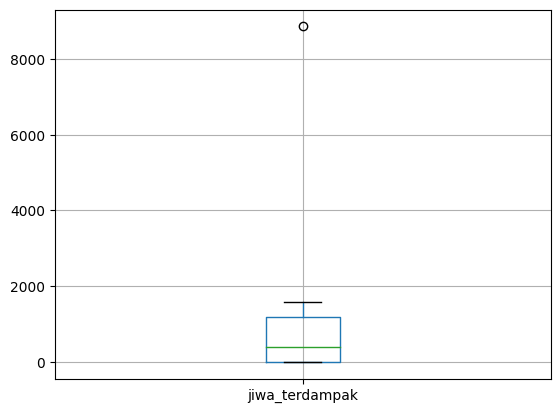

Final shape:  (11, 16)


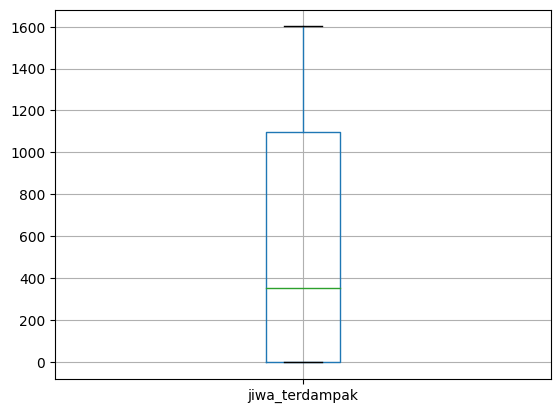

2020
Check for missing values:
tahun                              False
bulan                              False
kecamatan                          False
kelurahan                          False
rata_rata_ketinggian_air           False
lama_genangan                      False
rw_terdampak                       False
kk_terdampak                       False
jiwa_terdampak                     False
korban_meninggal                   False
korban_hilang                      False
korban_luka_berat                  False
korban_luka_ringan                 False
jumlah_jiwa_pengungsi_tertinggi    False
jumlah_tempat_pengungsian          False
jumlah_nilai_kerugian              False
dtype: bool

Initial shape:  (12, 16)


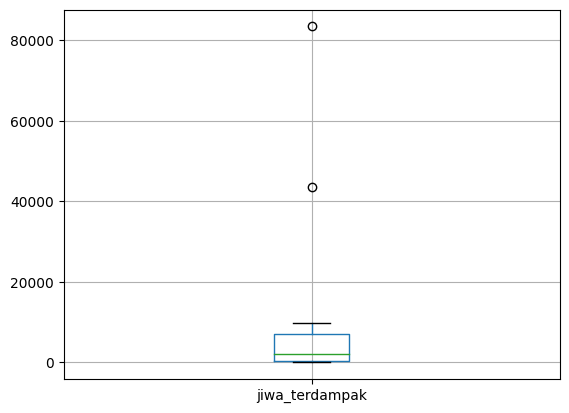

Final shape:  (10, 16)


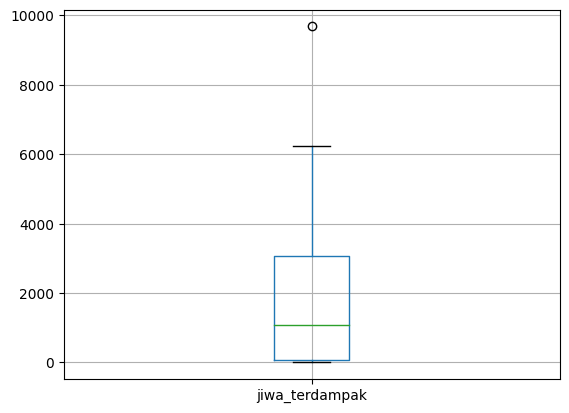

In [354]:
# Data Cleansing
for i in range (len(list_data)):
  print(list_data[i].iloc[0, 0])
  # Missing Value Handling Data 2015
  # Isi missing value kolom dengan mean
  list_data[i]["kk_terdampak"].fillna(list_data[i]["kk_terdampak"].mean(), inplace=True)
  list_data[i]["jiwa_terdampak"].fillna(list_data[i]["jiwa_terdampak"].mean(), inplace=True)
  list_data[i]["jumlah_nilai_kerugian"].fillna(0, inplace=True)

  # Cek missing values pada dataset
  print("Check for missing values:")
  print(list_data[i].isnull().any())
  print()

  # Outliers Handling
  # Q1, Q3, dan IQR untuk kolom jiwa terdampak
  Q1 = list_data[i]["jiwa_terdampak"].quantile(0.25)
  Q3 = list_data[i]["jiwa_terdampak"].quantile(0.75)
  IQR = Q3 - Q1

  # Sebelum outlier dihapus
  print("Initial shape: ", list_data[i].shape)
  list_data[i].boxplot(column=["jiwa_terdampak"], return_type="axes")
  plt.show()

  # Menghilangkan outliers
  list_data[i] = list_data[i][~((list_data[i]["jiwa_terdampak"] < (Q1 - 1.5*IQR)) | (list_data[i]["jiwa_terdampak"] > (Q3 + 1.5*IQR)))]

  # Setelah outlier dihapus
  print("Final shape: ", list_data[i].shape)
  list_data[i].boxplot(column=["jiwa_terdampak"], return_type="axes")
  plt.show()

# Update dataframe dataset
data_rekap = pd.concat(list_data, axis=0, ignore_index=True)

In [355]:
# Deskripsi statistik
data_rekap.describe()

,tahun,bulan,kecamatan,kelurahan,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian,jumlah_nilai_kerugian
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0,63.0,63.0,63.000000,63.000000,63.0
mean,2017.476190,6.825397,9.000000,16.412698,1.396825,40.714286,1479.312169,4767.230159,0.031746,0.0,0.0,0.0,261.428571,4.761905,0.0
std,1.721376,3.270295,7.337487,15.726119,1.024533,44.361938,2776.187164,8473.544324,0.251976,0.0,0.0,0.0,656.349723,11.031793,0.0
min,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
25%,2016.000000,4.000000,3.000000,3.500000,1.000000,7.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
50%,2017.000000,7.000000,8.000000,12.000000,1.000000,26.000000,387.000000,1203.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
75%,2019.000000,9.500000,15.000000,26.000000,2.000000,56.000000,1735.222222,6108.500000,0.000000,0.0,0.0,0.0,143.500000,4.500000,0.0
max,2020.000000,12.000000,29.000000,72.000000,4.000000,221.000000,16145.000000,51234.000000,2.000000,0.0,0.0,0.0,3255.000000,59.000000,0.0


In [356]:
# Normalisasi data dengan Min-Max scaler
# Pisahkan features numerik dari dataset
data_norm = data_rekap.copy()

# Hapus data kontinu
data_norm = data_norm.drop("rata_rata_ketinggian_air", axis=1)
array = data_norm.values
X = array[:, 2:15]

# Inisiasi kolom data normalisasi
data_norm_col = data_norm.columns.to_list()
data_norm_col.remove("tahun")
data_norm_col.remove("bulan")

# Inisiasi Min-Max scaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))

# Transformasi Min-Max scaler
data = min_max_scaler.fit_transform(X)
data_norm = pd.DataFrame(data, columns=data_norm_col)
data_norm.insert(loc=0, column="tahun", value=data_rekap["tahun"].values)
data_norm.insert(loc=1, column="bulan", value=data_rekap["bulan"].values)
print("Normalized dataset :")
data_norm.head(10)

Normalized dataset :


,tahun,bulan,kecamatan,kelurahan,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian,jumlah_nilai_kerugian
0,2015,1,0.517241,0.500000,0.50,1.000000,0.377516,0.255163,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0
1,2015,3,0.413793,0.208333,1.00,0.135747,0.177702,0.158469,0.0,0.0,0.0,0.0,0.252535,0.084746,0.0
2,2015,4,0.137931,0.083333,0.75,0.081448,0.138433,0.154292,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,2015,5,0.034483,0.013889,0.25,0.031674,0.026200,0.040754,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,2015,6,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
5,2015,7,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
6,2015,8,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
7,2015,9,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
8,2015,10,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
9,2015,11,0.241379,0.152778,1.00,0.162896,0.238959,0.257544,0.0,0.0,0.0,0.0,0.164055,0.135593,0.0


In [375]:
# Hubungan antara variabel spasial dengan variabel jumlah
# Nilai korelasi antara dua variabel
def corr(a, b):
  print("Correlation between", a, "and", b)
  print(data_rekap[[a, b]].corr())
  plt.plot(data_rekap[a], data_rekap[b], "o")
  plt.show()

# Regresi linier antara dua variabel
def lin_reg(a, b):
  # Inisiasi array data
  x = np.array(data_norm[a]).reshape(-1, 1)
  y = np.array(data_norm[b]).reshape(-1, 1)

  # Split data menjadi data training & test
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

  # Model polynomial regression
  lin_reg_model = LinearRegression().fit(x_train,y_train)
  y_pred = lin_reg_model.predict(x_test)

  # Cetak score regresi
  print("Regression score: ", lin_reg_model.score(x_test, y_test))

  # Plot regresi
  plt.scatter(x_test, y_test)
  plt.plot(x_test, y_pred, color ='k')
  plt.show()

  print()

Correlation between kelurahan and rw_terdampak
              kelurahan  rw_terdampak
kelurahan      1.000000      0.906729
rw_terdampak   0.906729      1.000000


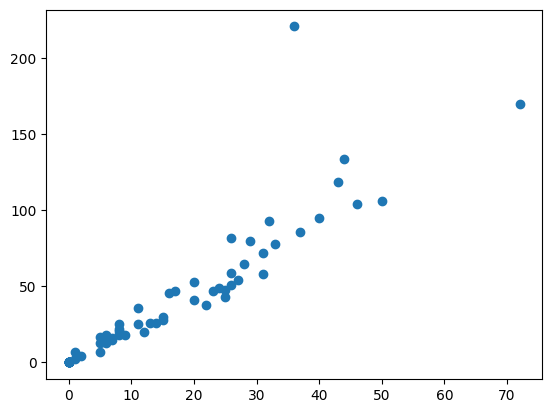

Regression score:  0.5674523060910801


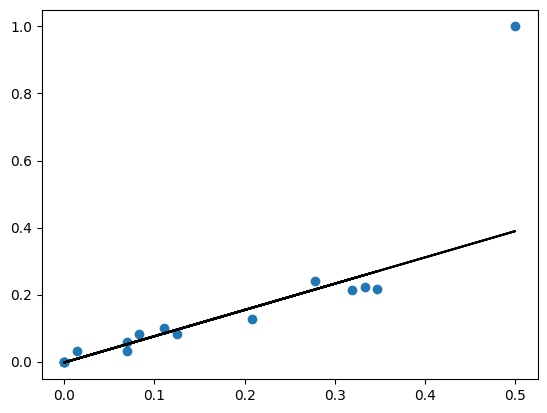


Correlation between kelurahan and kk_terdampak
              kelurahan  kk_terdampak
kelurahan      1.000000      0.397062
kk_terdampak   0.397062      1.000000


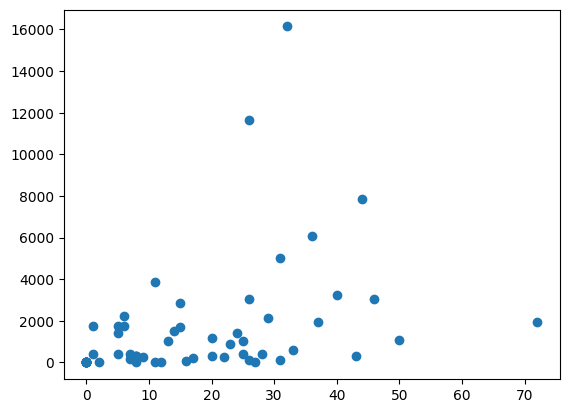

Regression score:  0.32368208327726067


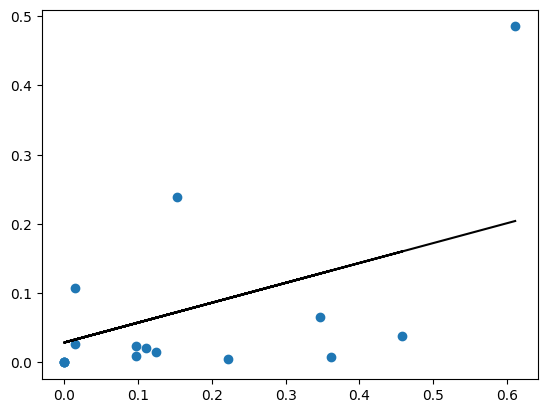


Correlation between kecamatan and rw_terdampak
              kecamatan  rw_terdampak
kecamatan      1.000000      0.841124
rw_terdampak   0.841124      1.000000


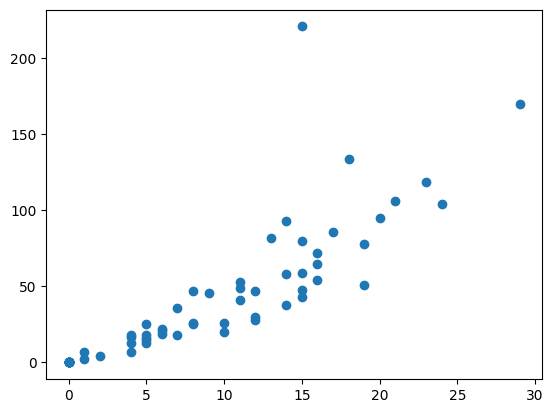

Regression score:  0.7843876450849621


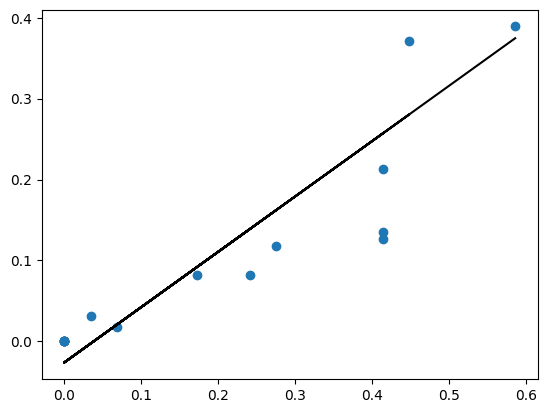


Correlation between kecamatan and kk_terdampak
              kecamatan  kk_terdampak
kecamatan      1.000000      0.340347
kk_terdampak   0.340347      1.000000


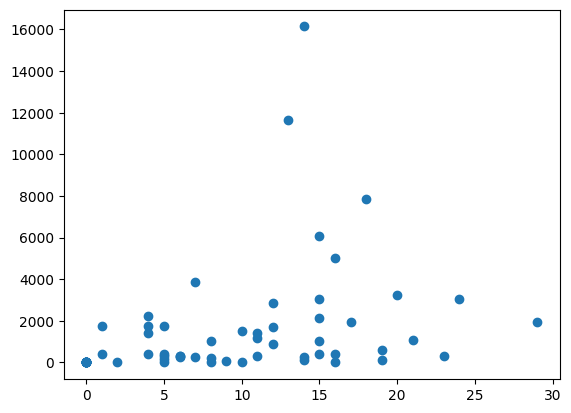

Regression score:  0.07136055000143982


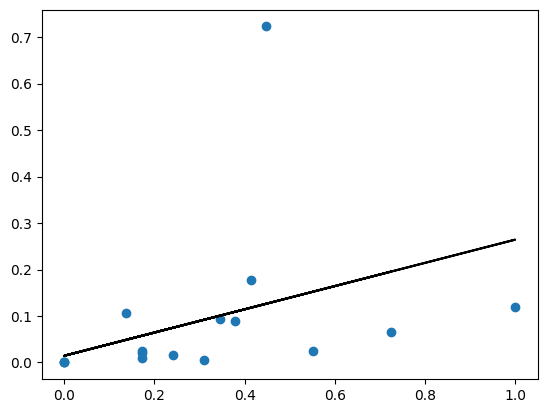

In [379]:
# Hubungan antara variabel spasial
# Hubungan antara kelurahan dengan rw_terdampak
corr("kelurahan", "rw_terdampak")
lin_reg("kelurahan", "rw_terdampak")

# Hubungan antara kelurahan dengan kk_terdampak
corr("kelurahan", "kk_terdampak")
lin_reg("kelurahan", "kk_terdampak")

# Hubungan antara kecamatan dengan rw_terdampak
corr("kecamatan", "rw_terdampak")
lin_reg("kecamatan", "rw_terdampak")

# Hubungan antara kecamatan dengan kk_terdampak
corr("kecamatan", "kk_terdampak")
lin_reg("kecamatan", "kk_terdampak")

Correlation between jiwa_terdampak and korban_meninggal
                  jiwa_terdampak  korban_meninggal
jiwa_terdampak          1.000000          0.410245
korban_meninggal        0.410245          1.000000


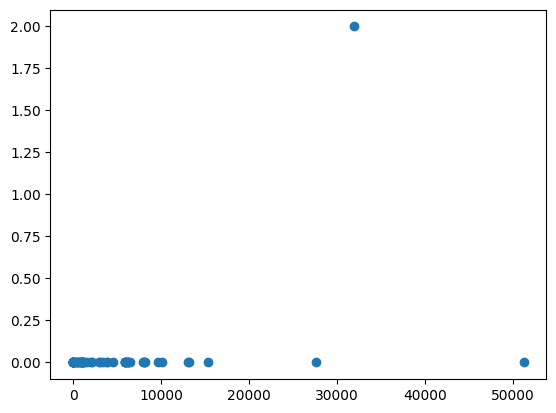

Regression score:  0.0


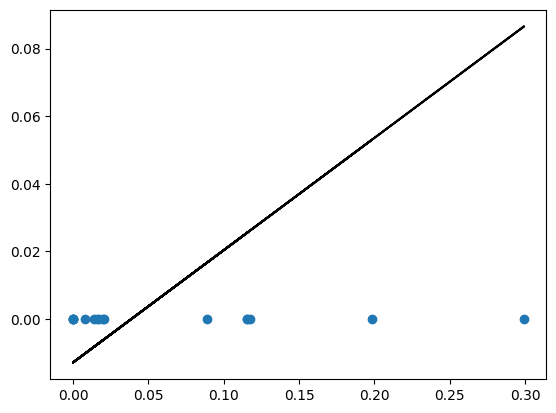


Correlation between jumlah_tempat_pengungsian and jiwa_terdampak
                           jumlah_tempat_pengungsian  jiwa_terdampak
jumlah_tempat_pengungsian                   1.000000        0.521287
jiwa_terdampak                              0.521287        1.000000


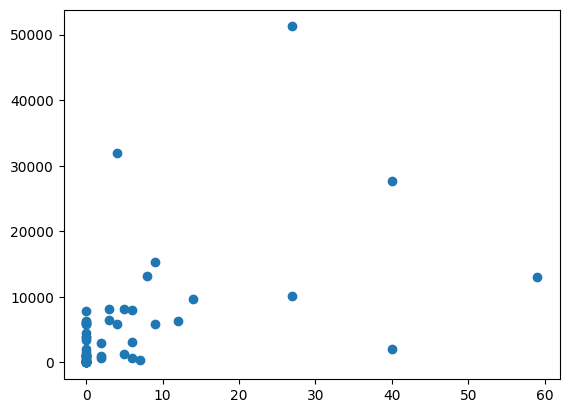

Regression score:  0.16377195131383282


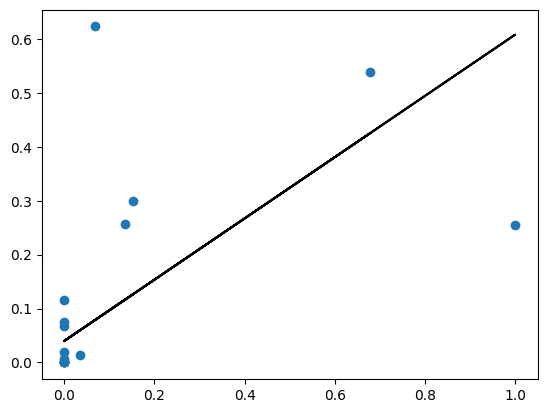


Correlation between jumlah_tempat_pengungsian and korban_meninggal
                           jumlah_tempat_pengungsian  korban_meninggal
jumlah_tempat_pengungsian                   1.000000         -0.008842
korban_meninggal                           -0.008842          1.000000


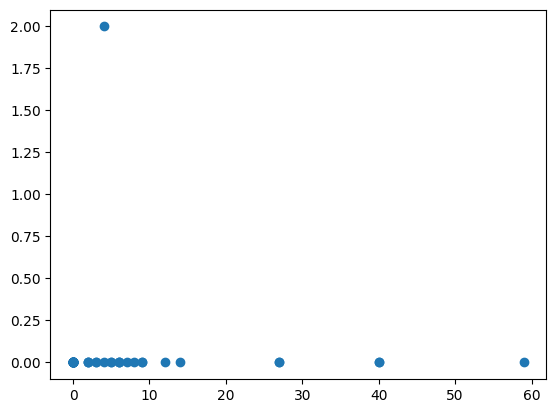

Regression score:  0.0


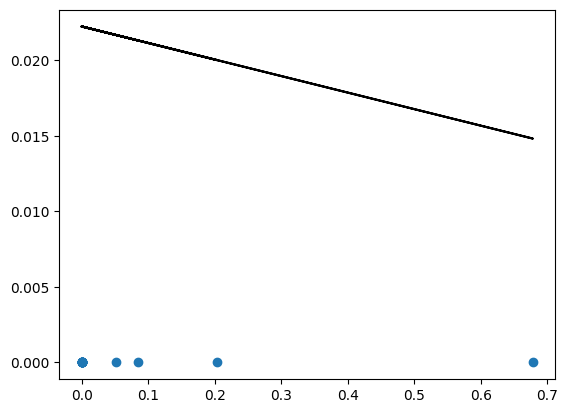


Correlation between lama_genangan and korban_meninggal
                  lama_genangan  korban_meninggal
lama_genangan           1.00000           0.07537
korban_meninggal        0.07537           1.00000


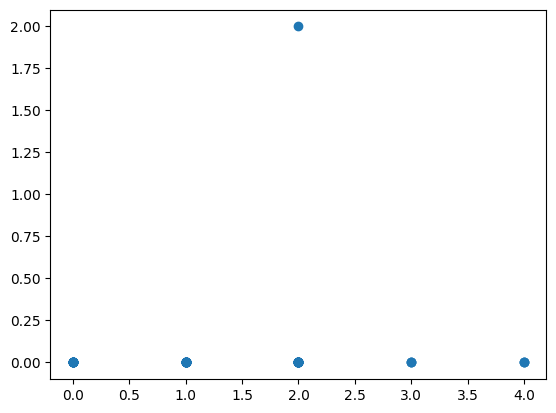

Regression score:  0.0


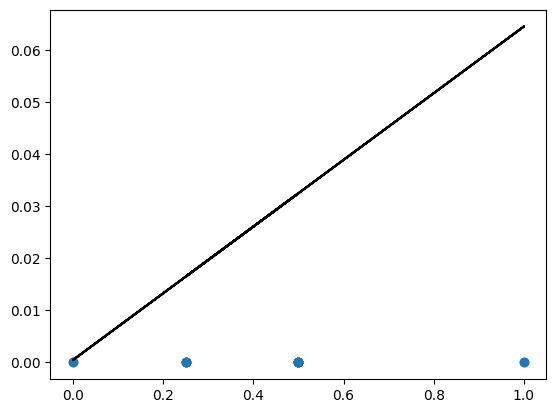


Correlation between lama_genangan and jumlah_tempat_pengungsian
                           lama_genangan  jumlah_tempat_pengungsian
lama_genangan                   1.000000                   0.236821
jumlah_tempat_pengungsian       0.236821                   1.000000


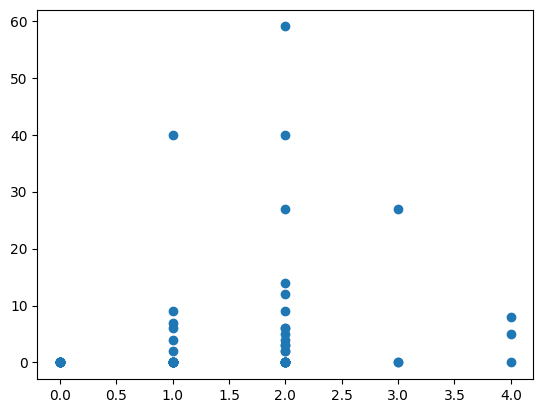

Regression score:  0.11770994008729718


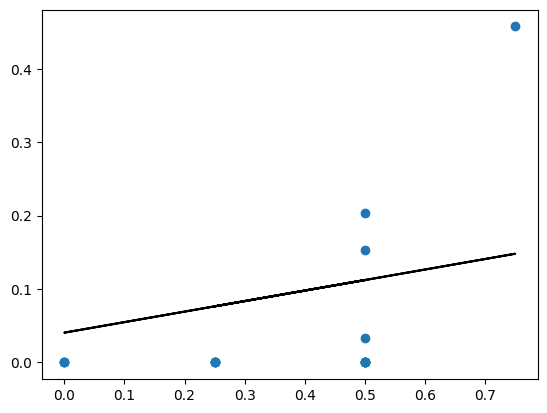


Correlation between lama_genangan and jumlah_jiwa_pengungsi_tertinggi
                                 lama_genangan  \
lama_genangan                         1.000000   
jumlah_jiwa_pengungsi_tertinggi       0.320788   

                                 jumlah_jiwa_pengungsi_tertinggi  
lama_genangan                                           0.320788  
jumlah_jiwa_pengungsi_tertinggi                         1.000000  


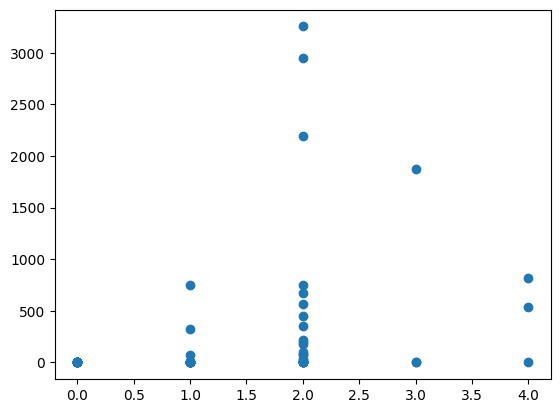

Regression score:  0.023007715965275066


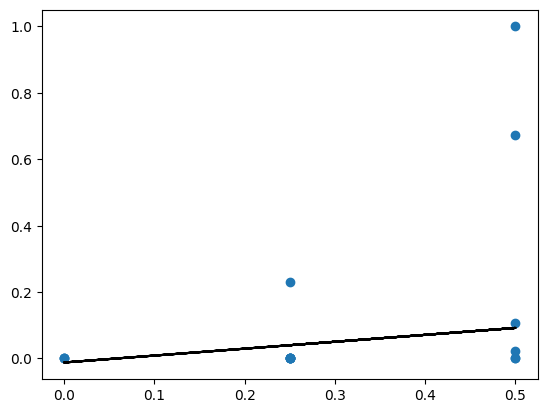

In [380]:
# Hubungan antarvariabel yang berhubungan dengan mobilitas
# Hubungan antara jiwa_terdampak dengan korban_meninggal
corr("jiwa_terdampak", "korban_meninggal")
lin_reg("jiwa_terdampak", "korban_meninggal")

# Hubungan antara jumlah_tempat_pengungsian dan jiwa_terdampak
corr("jumlah_tempat_pengungsian", "jiwa_terdampak")
lin_reg("jumlah_tempat_pengungsian", "jiwa_terdampak")

# Hubungan antara jumlah_tempat_pengungsian dan korban_meninggal
corr("jumlah_tempat_pengungsian", "korban_meninggal")
lin_reg("jumlah_tempat_pengungsian", "korban_meninggal")

# Hubungan antara lama_genangan dan korban_meninggal
corr("lama_genangan", "korban_meninggal")
lin_reg("lama_genangan", "korban_meninggal")

# Hubungan antara lama_genangan dan jumlah_tempat_pengungsian
corr("lama_genangan", "jumlah_tempat_pengungsian")
lin_reg("lama_genangan", "jumlah_tempat_pengungsian")

# Hubungan antara lama_genangan dan jumlah_jiwa_pengungsi_tertinggi
corr("lama_genangan", "jumlah_jiwa_pengungsi_tertinggi")
lin_reg("lama_genangan", "jumlah_jiwa_pengungsi_tertinggi")

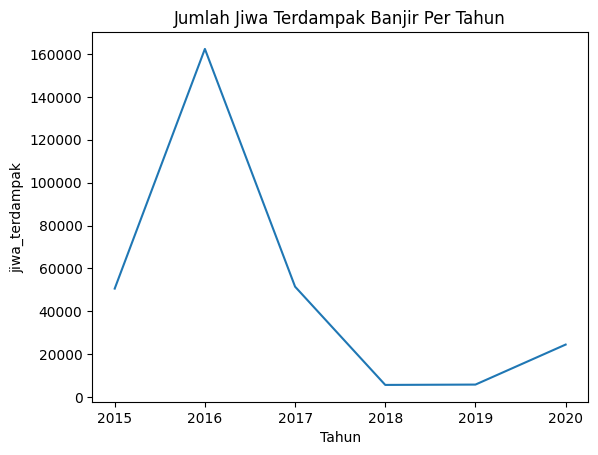

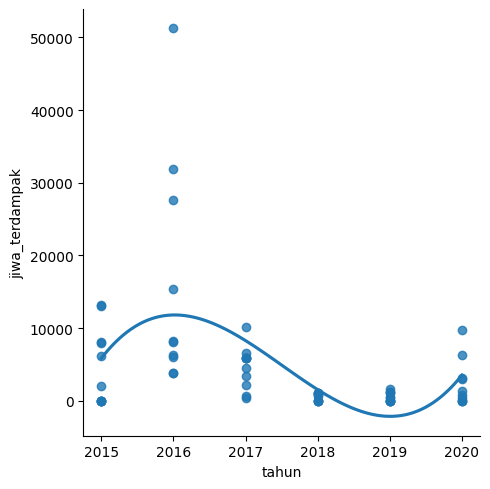

In [332]:
# Jumlah Jiwa Terdampak Banjir Per Tahun
year = [2015, 2016, 2017, 2018, 2019, 2020]
plt.plot(year, data_rekap.groupby("tahun")["jiwa_terdampak"].sum())
plt.title("Jumlah Jiwa Terdampak Banjir Per Tahun")
plt.xlabel("Tahun")
plt.ylabel("jiwa_terdampak")

# Linear model plot
sns.lmplot(data=data_rekap, x="tahun", y="jiwa_terdampak", order=3, ci=None)

Regression score:  0.28949485721499313


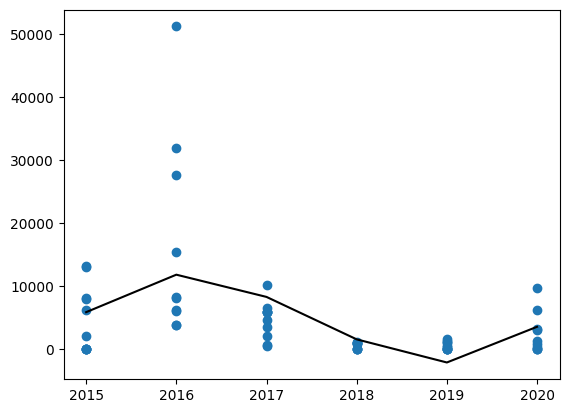

In [443]:
# Model regresi polinomial jumlah jiwa terdampak per tahun
# Reshape data
x = np.array(data_rekap['tahun']).reshape(-1, 1)
y = np.array(data_rekap['jiwa_terdampak']).reshape(-1, 1)

# Inisiasi polynomial orde-3
poly = PolynomialFeatures(degree=3, include_bias=False)

# Inisiasi feature baru
poly_features = poly.fit_transform(x)

# Model polynomial regression
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)

# Cetak score regresi
print("Regression score: ", poly_reg_model.score(poly_features, y))

# Plot regresi
plt.scatter(x, y)
plt.plot(x, y_predicted, "k")
plt.show()

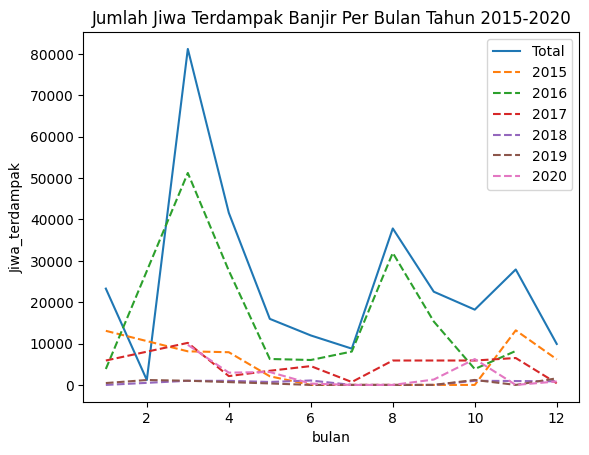

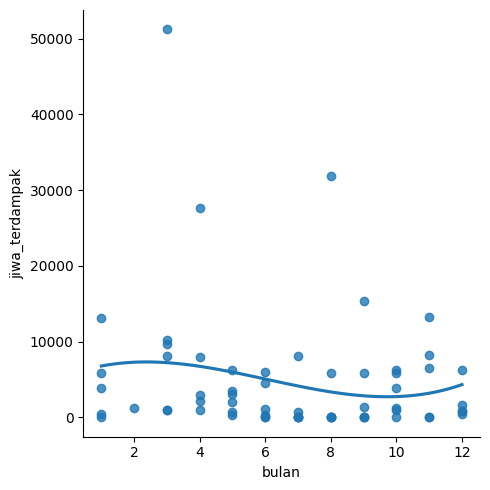

In [333]:
# Jumlah Jiwa Terdampak Banjir Per Bulan Tahun 2015-2020
months = [i for i in range(1, int(len(data_rekap.groupby("bulan")))+1)]
plt.plot(months, data_rekap.groupby("bulan")["jiwa_terdampak"].sum(), "-", label = "Total")
plt.plot(list_data[0]["bulan"], list_data[0].groupby("bulan")["jiwa_terdampak"].sum(), "--", label = "2015")
plt.plot(list_data[1]["bulan"], list_data[1].groupby("bulan")["jiwa_terdampak"].sum(), "--", label = "2016")
plt.plot(list_data[2]["bulan"], list_data[2].groupby("bulan")["jiwa_terdampak"].sum(), "--", label = "2017")
plt.plot(list_data[3]["bulan"], list_data[3].groupby("bulan")["jiwa_terdampak"].sum(), "--", label = "2018")
plt.plot(list_data[4]["bulan"], list_data[4].groupby("bulan")["jiwa_terdampak"].sum(), "--", label = "2019")
plt.plot(list_data[5]["bulan"], list_data[5].groupby("bulan")["jiwa_terdampak"].sum(), "--", label = "2020")
plt.legend()
plt.title("Jumlah Jiwa Terdampak Banjir Per Bulan Tahun 2015-2020")
plt.xlabel("bulan")
plt.ylabel("Jiwa_terdampak")

# Plot regresi polinomial
sns.lmplot(data=data_rekap, x="bulan", y="jiwa_terdampak", order=3, ci=None)

Regression score:  0.03723320143705655
jiwa_terdampak in July:  4140.2041156577


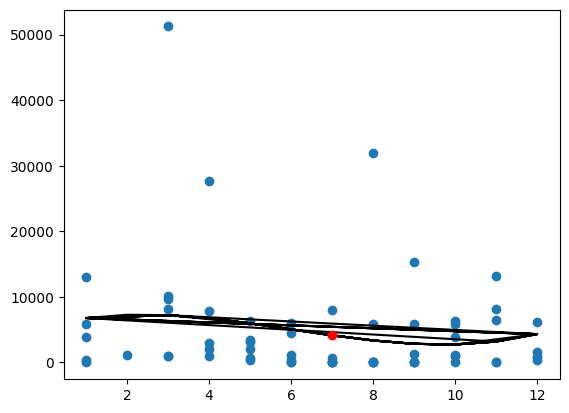

In [444]:
# Model regresi polinomial jumlah jiwa terdampak per bulan
# Reshape data
x = np.array(data_rekap['bulan']).reshape(-1, 1)
y = np.array(data_rekap['jiwa_terdampak']).reshape(-1, 1)

# Inisiasi polynomial orde-3
poly = PolynomialFeatures(degree=3, include_bias=False)

# Inisiasi feature baru
poly_features = poly.fit_transform(x)

# Model polynomial regression
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)

# Cetak score regresi
print("Regression score: ", poly_reg_model.score(poly_features, y))
print("jiwa_terdampak in July: ", float(y_predicted[5]))

# Plot regresi
plt.scatter(x, y)
plt.plot(x, y_predicted, "k")
plt.plot(x[5], y_predicted[5], "ro", label = "y_predict")
plt.show()

In [415]:
# Deskripsi statistik curah hujan 2018-2020
data_hujan.describe()

,tahun,bulan,curah
count,36.000000,36.00000,36.000000
mean,2019.000000,6.50000,162.611111
std,0.828079,3.50102,206.006520
min,2018.000000,1.00000,0.000000
25%,2018.000000,3.75000,22.600000
50%,2019.000000,6.50000,117.400000
75%,2020.000000,9.25000,210.000000
max,2020.000000,12.00000,1043.200000


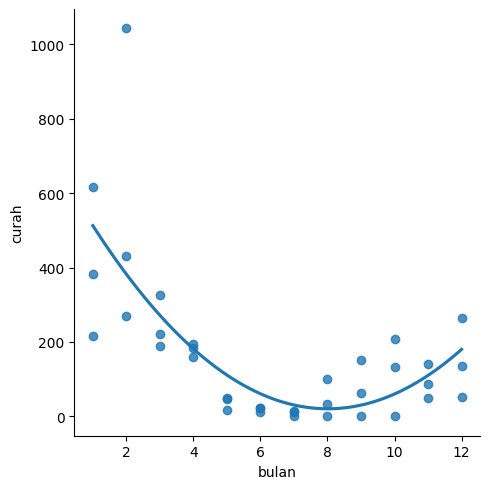

Regression score:  0.5355168307392804
curah_hujan in July:  30.478787878787898


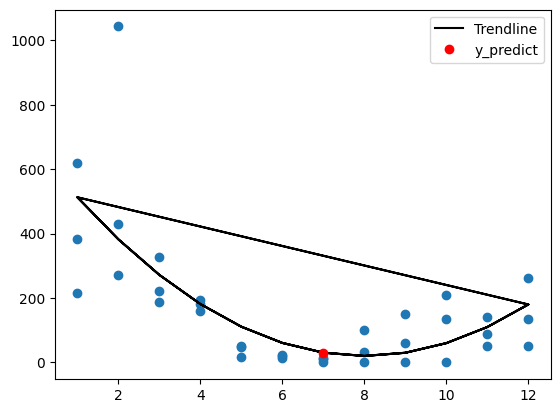

In [438]:
# Plot regresi polinomial curah hujan 2018-2020
sns.lmplot(data=data_hujan, x="bulan", y="curah", order=2, ci=None)
plt.show()

# Model regresi polinomial jumlah jiwa terdampak per bulan
# Reshape data
x = np.array(data_hujan['bulan']).reshape(-1, 1)
y = np.array(data_hujan['curah']).reshape(-1, 1)

# Inisiasi polynomial orde-2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Inisiasi feature baru
poly_features = poly.fit_transform(x)

# Model polynomial regression
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)

# Cetak score regresi
print("Regression score: ", poly_reg_model.score(poly_features, y))
print("curah_hujan in July: ", float(y_predicted[6]))

# Plot regresi
plt.scatter(x, y)
plt.plot(x, y_predicted, "k", label = "Trendline")
plt.plot(x[6], y_predicted[6], "ro", label = "y_predict")
plt.legend()
plt.show()

In [517]:
# Pisahkan data 2018-2020 dari dataset
data_rekap.groupby("tahun")["lama_genangan"].count()
lama_genangan = []
bulan = []
jiwa_terdampak = []
tahun = []

for i in range(32, len(data_rekap)):
  bulan.append(data_rekap.iloc[i, 1])
  lama_genangan.append(data_rekap.iloc[i, 5])
  jiwa_terdampak.append(data_rekap.iloc[i, 8])

df1 = pd.DataFrame(bulan, columns=["bulan"])
df2 = pd.DataFrame(lama_genangan, columns=["lama_genangan"])
df3 = pd.DataFrame(jiwa_terdampak, columns=["jiwa_terdampak"])
df_temp = pd.concat([df1, df2, df3], axis=1)

Hubungan antara curah_hujan dengan bulan
          bulan     curah
bulan  1.000000 -0.443459
curah -0.443459  1.000000


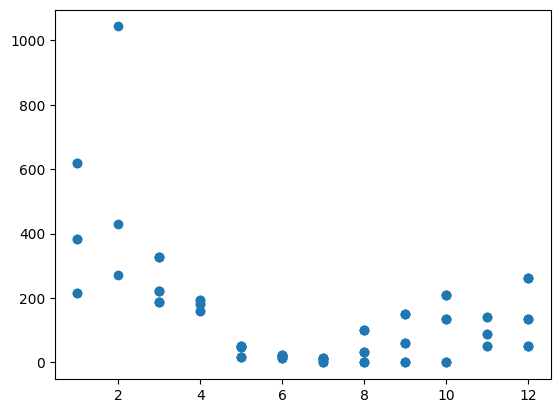

Hubungan antara curah_hujan dengan lama_genangan
               lama_genangan     curah
lama_genangan       1.000000  0.357961
curah               0.357961  1.000000


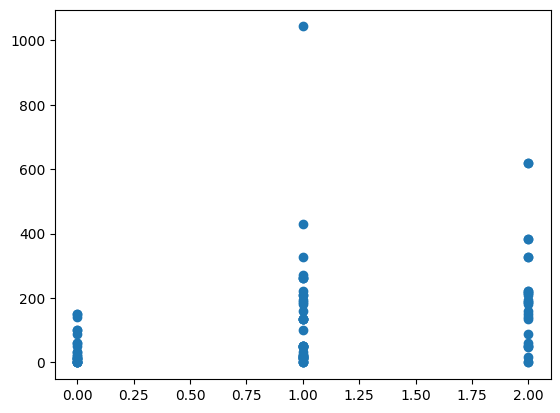

Hubungan antara curah_hujan dengan jiwa_terdampak
                jiwa_terdampak     curah
jiwa_terdampak        1.000000  0.156226
curah                 0.156226  1.000000


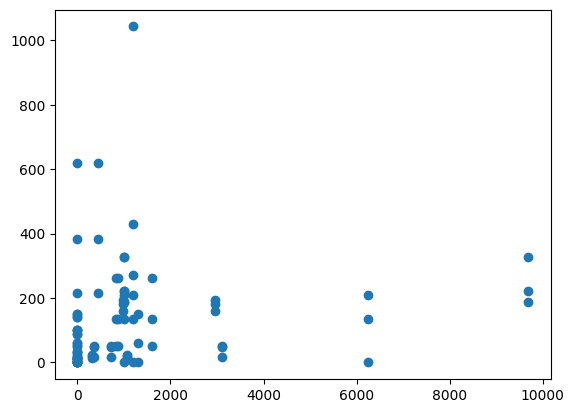

In [523]:
# Hubungan antara variabel curah_hujan, bulan, lama_genangan, dan jiwa_terdampak
df = pd.merge(data_hujan, df_temp, on = "bulan")
df.fillna(0)


print("Hubungan antara curah_hujan dengan bulan")
print(df[["bulan", "curah"]].corr())

plt.plot(df["bulan"], df["curah"], "o")
plt.show()

print("Hubungan antara curah_hujan dengan lama_genangan")
print(df[["lama_genangan", "curah"]].corr())

plt.plot(df["lama_genangan"], df["curah"], "o")
plt.show()

print("Hubungan antara curah_hujan dengan jiwa_terdampak")
print(df[["jiwa_terdampak", "curah"]].corr())

plt.plot(df["jiwa_terdampak"], df["curah"], "o")
plt.show()